In [128]:
path = ('/Users/carolinesklaver/Desktop/Capstone/NHANES/data/csv_data/')

import os
os.chdir(path)
SEED = 42

# target binary feature
target = 'depressed'

import numpy as np

#continuous features
cont = ['#_ppl_household', 'age', 'triglyceride','caffeine', 'lifetime_partners',
       'glycohemoglobin', 'CRP', 'tot_cholesterol','systolic_BP','diastolic_BP', 'BMI', 'waist_C', '#meals_fast_food',
       'min_sedetary', 'bone_mineral_density']

# categorical features
cat = ['race_ethnicity', 'edu_level', 'gender', 'marital_status', 'annual_HI',
       'doc_diabetes', 'how_healthy_diet', 'used_CMH',
       'health_insurance', 'doc_asthma', 'doc_overweight', 'doc_arthritis',
       'doc_CHF', 'doc_CHD', 'doc_heart_attack', 'doc_stroke',
       'doc_chronic_bronchitis', 'doc_liver_condition', 'doc_thyroid_problem',
       'doc_cancer', 'difficult_seeing', 'doc_kidney', 'broken_hip',
       'doc_osteoporosis', 'vigorous_activity', 'moderate_activity',
       'doc_sleeping_disorder', 'smoker', 'sexual_orientation',
       'alcoholic','herpes_2', 'HIV', 'doc_HPV','difficult_hearing', 'doc_COPD']

# multi-class features
cat_encode = ['race_ethnicity', 'edu_level', 'gender', 'marital_status', 'annual_HI','how_healthy_diet',
              'sexual_orientation']

In [129]:
import pandas as pd
df_mlp_impute = pd.read_csv('df_progressive_mlp_2.csv')
df_mlp_impute.drop(['year'],axis=1, inplace=True)
df_mlp_impute.drop(['SEQN'],axis=1, inplace=True)

In [130]:
from sklearn.model_selection import train_test_split

# Function to One-hot-encode the categorical features
def one_hot_encode(df):
    cols = df.columns
    e_cols = list(set(cols).intersection(set(cat_encode)))
    df_encode = pd.get_dummies(df, columns=e_cols)

    return (df_encode)

df = one_hot_encode(df_mlp_impute)

# divide into training and testing
# df_raw_train, df_raw_test = train_test_split(df, test_size=0.2, random_state=SEED)

# # Reset the index
# df_raw_train, df_raw_test = df_raw_train.reset_index(drop=True), df_raw_test.reset_index(drop=True)

# # Make a copy of df_raw_train
# df_train = df_raw_train.copy(deep=True)

# # Make a copy of df_raw_test
# df_test = df_raw_test.copy(deep=True)

# df = pd.concat([df_train, df_test], sort=False)

# get the name of the features
features = np.setdiff1d(df.columns, [target])


# # Get the feature matrix
# X_train = df_train[features].to_numpy()
# X_test = df_test[features].to_numpy()

# # Get the target vector
# y_train = df_train[target].astype(int).to_numpy()
# y_test = df_test[target].astype(int).to_numpy()


# from sklearn.preprocessing import StandardScaler

# # The StandardScaler
# ss = StandardScaler()

# # Standardize the training data
# X_train = ss.fit_transform(X_train)

# # Standardize the testing data
# X_test = ss.transform(X_test)


# input_size = len(df_train.columns)-1

In [131]:
df.head()

,depressed,#_ppl_household,age,caffeine,doc_diabetes,used_CMH,health_insurance,doc_asthma,doc_overweight,doc_arthritis,...,marital_status_5.0,marital_status_6.0,how_healthy_diet_1.0,how_healthy_diet_2.0,how_healthy_diet_3.0,how_healthy_diet_4.0,how_healthy_diet_5.0,how_healthy_diet_9.0,gender_1.0,gender_2.0
0,0.0,4.0,44.0,1.300000e+01,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,1
1,0.0,2.0,70.0,2.600000e+02,1.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,0.0,2.0,73.0,1.420000e+02,0.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,0.0,3.0,18.0,5.397605e-79,0.0,0.0,1.0,1.0,1.0,0.0,...,1,0,0,0,1,0,0,0,0,1
4,0.0,3.0,19.0,5.397605e-79,0.0,0.0,1.0,0.0,0.0,0.0,...,1,0,0,0,1,0,0,0,1,0


In [132]:
# we have df which is encoded, lets get the testing and validation sets
from sklearn.model_selection import train_test_split

# divide into training and testing
df_raw_train, df_raw_test = train_test_split(df, test_size=0.2, random_state=SEED)
# Reset the index
df_raw_train, df_raw_test = df_raw_train.reset_index(drop=True), df_raw_test.reset_index(drop=True)

# Make a copy of df_raw_train
df_train = df_raw_train.copy(deep=True)
# Make a copy of df_raw_test
df_test = df_raw_test.copy(deep=True)


# Divide the training data into training (80%) and validation (20%)
df_train, df_valid = train_test_split(df_train, train_size=0.8, random_state=42, stratify=df_train[target])
# Reset the index
df_train, df_valid = df_train.reset_index(drop=True), df_valid.reset_index(drop=True)


In [133]:
# now we have df_train, df_valid, df_test
# let's standardize the testing and validation
# separate X_test, y_test and X_val, y_val
X_test = df_test[features]
y_test = df_test[target]

X_val = df_valid[features]
y_val = df_valid[target]

# Scale the test and valid features
X_test[cont] = ss.fit_transform(X_test[cont])
X_test.columns = X_test.keys().tolist()

X_val[cont] = ss.fit_transform(X_val[cont])
X_val.columns = X_val.keys().tolist()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [134]:
X_val

,#_ppl_household,#meals_fast_food,BMI,CRP,HIV,age,alcoholic,annual_HI_1.0,annual_HI_10.0,annual_HI_11.0,...,sexual_orientation_3.0,sexual_orientation_4.0,sexual_orientation_5.0,smoker,systolic_BP,tot_cholesterol,triglyceride,used_CMH,vigorous_activity,waist_C
0,1.635930,-0.836587,0.164802,-0.512095,0.0,-1.360626,0.0,0,0,0,...,0,0,0,0.0,-0.127785,0.957942,0.591330,0.0,1.0,0.371829
1,-0.722875,-0.411272,-0.753192,1.882147,0.0,0.338135,0.0,0,0,0,...,0,0,0,0.0,-0.346085,1.227433,0.001512,0.0,0.0,-0.686526
2,-0.133174,0.439359,2.630189,-0.079240,0.0,1.293689,0.0,0,0,0,...,0,0,0,0.0,1.206601,1.031439,0.168181,0.0,1.0,2.309155
3,-0.133174,-0.095377,-1.201313,0.276345,0.0,0.656653,1.0,0,0,0,...,0,0,0,1.0,0.196809,-0.120023,-0.084354,0.0,0.0,-1.033331
4,0.456528,-0.411272,-1.415947,-0.379657,0.0,-0.723590,0.0,0,0,0,...,0,0,0,0.0,-0.673535,0.075970,-0.717249,0.0,0.0,-1.278487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5012,-1.312576,-0.411272,1.615029,0.262518,0.0,0.072704,0.0,0,0,0,...,0,0,0,1.0,0.527114,-0.340516,0.963283,0.0,0.0,2.141732
5013,-1.312576,-0.430966,-0.474749,0.295462,0.0,1.665293,0.0,0,0,0,...,0,0,0,1.0,0.199665,0.394460,0.171586,0.0,0.0,0.599046
5014,-0.722875,-0.836587,-0.835855,0.063354,0.0,0.603567,1.0,0,0,0,...,0,0,0,1.0,-0.127785,0.013322,-0.022111,0.0,0.0,-0.483226
5015,-0.722875,0.439359,0.701386,-0.044974,0.0,-1.360626,0.0,0,0,0,...,0,0,0,1.0,-1.874184,-0.879498,-0.424213,0.0,1.0,0.425643


In [135]:
# now lets move on to over-sampling the training data
X_train = df_train[features]
y_train = df_train[target]

In [136]:
# SMOTE over-sampling
import imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=SEED, sampling_strategy='minority')

X_sm, y_sm = smote.fit_sample(X_train, y_train)

X_sm = pd.DataFrame(X_sm)
X_sm.columns = X.keys().tolist()

y_sm = pd.DataFrame(y_sm, columns=['depressed'])

print('smote df', X_sm.head())
print('smote value counts', y_sm.depressed.value_counts())



smote df    #_ppl_household  #meals_fast_food    BMI       CRP  HIV   age  alcoholic  \
0              2.0          0.953694  26.91  0.150000  0.0  70.0        0.0   
1              6.0          1.628220  33.60  0.216375  0.0  47.0        0.0   
2              7.0          3.519561  28.40  0.234084  0.0  28.0        0.0   
3              1.0          1.441277  30.10  0.364533  0.0  61.0        0.0   
4              4.0          1.940883  32.09  0.040085  0.0  62.0        0.0   

   annual_HI_1.0  annual_HI_10.0  annual_HI_11.0  ...  sexual_orientation_3.0  \
0              0               1               0  ...                       0   
1              0               0               0  ...                       0   
2              0               0               0  ...                       0   
3              0               0               0  ...                       0   
4              0               0               0  ...                       0   

   sexual_orientation_4.0  se

In [137]:
# random oversampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy=0.3, random_state=SEED)
X_ros, y_ros = ros.fit_sample(X_train, y_train)

print(X_ros.shape[0] - X_train.shape[0], 'new random picked points')


X_ros = pd.DataFrame(X_ros)
X_ros.columns = X_train.keys().tolist()
y_ros = pd.DataFrame(y_ros, columns=['depressed'])


print(y_ros.depressed.value_counts())

4065 new random picked points
0.0    18564
1.0     5569
Name: depressed, dtype: int64


In [139]:
# over and undersampling
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=SEED)
X_smt, y_smt = smt.fit_sample(X_train, y_train)

print(X_ros.shape[0] - X_train.shape[0], 'new random picked points')


X_smt = pd.DataFrame(X_smt)
X_smt.columns = X_train.keys().tolist()
y_smt = pd.DataFrame(y_smt, columns=['depressed'])


print(y_smt.depressed.value_counts())

4065 new random picked points
1.0    18481
0.0    18481
Name: depressed, dtype: int64


In [140]:
# scaling the training over-sampled data
X=X_sm.copy()
y=y_sm.depressed

# scaling the training data
X[cont] = ss.fit_transform(X[cont])
X_train_sm = X.copy()
X_train_sm.columns = X.keys().tolist()

# whole data that is SMOTE upsampled and scaled
y_train_sm = y.copy()


# scaling the training over-sampled data
X=X_ros.copy()
y=y_ros.depressed

# scaling the training data
X[cont] = ss.fit_transform(X[cont])
X_train_ros = X.copy()
X_train_ros.columns = X.keys().tolist()

# whole data that is random oversampled and scaled
y_train_ros = y.copy()




# scaling the training over-sampled data
X=X_smt.copy()
y=y_smt.depressed

# scaling the training data
X[cont] = ss.fit_transform(X[cont])
X_train_smt = X.copy()
X_train_smt.columns = X.keys().tolist()

# whole data that is smotetomek upsampled and scaled
y_train_smt = y.copy()

In [141]:
# Now I have X_train_sm, y_train_sm, X_test, y_test, X_val, y_val all encoded and scaled

In [142]:
import keras
from keras import layers
from keras.layers import Activation, Dense, Dropout


In [89]:
# trying different loss function

import numpy as np
import keras.backend as K

def binary_recall_specificity(y_true, y_pred):

    TN = np.logical_and(K.eval(y_true) == 0, K.eval(y_pred) == 0)
    TP = np.logical_and(K.eval(y_true) == 1, K.eval(y_pred) == 1)

    FP = np.logical_and(K.eval(y_true) == 0, K.eval(y_pred) == 1)
    FN = np.logical_and(K.eval(y_true) == 1, K.eval(y_pred) == 0)

    # Converted as Keras Tensors
    TN = K.sum(K.variable(TN))
    FP = K.sum(K.variable(FP))

    specificity = TN / (TN + FP + K.epsilon())
    recall = TP / (TP + FN + K.epsilon())

    return recall

In [90]:
def custom_loss(recall_weight, spec_weight):

    def recall_spec_loss(y_true, y_pred):
        return binary_recall_specificity(y_true, y_pred, recall_weight, spec_weight)

    # Returns the (y_true, y_pred) loss function
    return recall_spec_loss

def recall_loss_wrapper():
    """A wrapper to create and return a function which computes the specificity loss, as (1 - specificity)

    """
    # Define the function for your loss
    def recall_loss(y_true, y_pred):
        return 1.0 - binary_recall_specificity(y_true, y_pred)

    return recall_loss

In [91]:
recall_loss = recall_loss_wrapper()

In [84]:
# Getting our loss function for specific weights
loss = custom_loss(recall_weight=0.9, spec_weight=0.1)

In [106]:

# def f1(y_true, y_pred, recall_weight, spec_weight):
#     y_pred = K.round(y_pred)
#     tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
#     tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
#     fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
#     fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

#     p = tp / (tp + fp + K.epsilon())
#     r = tp / (tp + fn + K.epsilon())
#     recall = tf.where(tf.is_nan(r), tf.zeros_like(r), r)
#     spec = tf.where(tf.is_nan(s), tf.zeros_like(s), s)
#     w = 1.0 - (recall_weight*recall + spec_weight*spec)
#     return K.mean(w)

def recall_loss(y_true, y_pred, recall_weight, prec_weight):
    
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    recall = tf.where(tf.is_nan(r), tf.zeros_like(r), r)
    prec = tf.where(tf.is_nan(p), tf.zeros_like(p), p)
    w = 1.0 - (recall_weight*recall + prec_weight*prec)
    return 1 - K.mean(w)


In [107]:
# Our custom loss' wrapper
def custom_loss(recall_weight, prec_weight):

    def recall_prec_loss(y_true, y_pred):
        return recall_loss(y_true, y_pred, recall_weight, prec_weight)

    # Returns the (y_true, y_pred) loss function
    return recall_prec_loss

In [110]:
loss = custom_loss(recall_weight=0.6,prec_weight=0.4)

In [179]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'),
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

class_weights = {1: 0.85,
                0: 0.15}

model = keras.Sequential()

from keras.optimizers import RMSprop
opt = RMSprop()

model.add(layers.Dense(64, activation='relu' , input_dim=input_size))
model.add(Dropout(0.5))
model.add(layers.Dense(64, activation='relu' , input_dim=input_size))
model.add(Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer=opt,metrics=METRICS)

history = model.fit(X_train_sm, y_train_sm, validation_data=(X_val, y_val),epochs=10, batch_size=128, shuffle=True)

Train on 37128 samples, validate on 5017 samples
Epoch 1/10
37128/37128 [==============================] - 8s 205us/step - loss: 0.3840 - tp: 14962.0000 - fp: 2555.0000 - tn: 16009.0000 - fn: 3602.0000 - accuracy: 0.8342 - precision: 0.8541 - recall: 0.8060 - auc: 0.9129 - val_loss: 0.2483 - val_tp: 104.0000 - val_fp: 149.0000 - val_tn: 4492.0000 - val_fn: 272.0000 - val_accuracy: 0.9161 - val_precision: 0.4111 - val_recall: 0.2766 - val_auc: 0.7653
Epoch 2/10
37128/37128 [==============================] - 5s 141us/step - loss: 0.2064 - tp: 16819.0000 - fp: 899.0000 - tn: 17665.0000 - fn: 1745.0000 - accuracy: 0.9288 - precision: 0.9493 - recall: 0.9060 - auc: 0.9695 - val_loss: 0.2297 - val_tp: 58.0000 - val_fp: 50.0000 - val_tn: 4591.0000 - val_fn: 318.0000 - val_accuracy: 0.9266 - val_precision: 0.5370 - val_recall: 0.1543 - val_auc: 0.7677
Epoch 3/10
37128/37128 [==============================] - 6s 171us/step - loss: 0.1731 - tp: 16933.0000 - fp: 513.0000 - tn: 18051.0000 - fn: 16

In [180]:
score = model.evaluate(X_test, y_test, batch_size=128)

f1 = 2*((score[6]*score[7])/(score[6]+score[6]))

print('Test loss:', score[0])
print('Test accuracy:', score[5])
print('Test precision:', score[6])
print('Test recall:', score[7])
print('Test F1-score:', f1)
print('Test auc:', score[8])
print('Test TP:', score[1])
print('Test FP:', score[2])
print('Test TN:', score[3])
print('Test FN:', score[4])

6272/6272 [==============================] - 1s 127us/step
Test loss: 0.24341818477426255
Test accuracy: 0.9207589030265808
Test precision: 0.37142857909202576
Test recall: 0.08297872543334961
Test F1-score: 0.08297872543334961
Test auc: 0.7641918063163757
Test TP: 39.0
Test FP: 66.0
Test TN: 5736.0
Test FN: 431.0


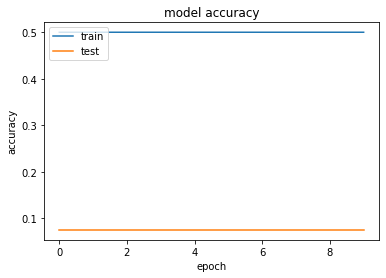

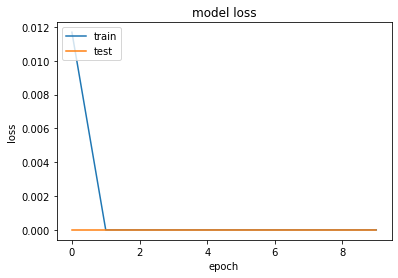

In [98]:
from matplotlib import pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [148]:
# lets try KNN
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

#create new a knn model
knn = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {"n_neighbors": np.arange(1, 25), 'weights':['uniform', 'distance']}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=5)

#fit model to data
knn_gscv.fit(X_sm, y_sm.values.ravel())

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                         'weights': ['uniform', 'distance']})

In [150]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = knn_gscv.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5802    0]
 [ 470    0]]
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96      5802
         1.0       0.00      0.00      0.00       470

    accuracy                           0.93      6272
   macro avg       0.46      0.50      0.48      6272
weighted avg       0.86      0.93      0.89      6272



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [181]:
# try RF
from sklearn.ensemble import RandomForestClassifier
# The grids for min_samples_split
min_samples_split_grids = [2, 20, 100]

# The grids for min_samples_leaf
min_samples_leaf_grids = [1, 20, 100]


param_grids = {'min_samples_split': min_samples_split_grids,
                       'min_samples_leaf': min_samples_leaf_grids}

rf = RandomForestClassifier(class_weight='balanced')

#use gridsearch to test all values for n_neighbors
rf_gscv = GridSearchCV(rf, param_grids, cv=5)

#fit model to data
rf_gscv.fit(X_sm, y_sm.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'min_samples_leaf': [1, 20, 100],
                         'min_samples_split': [2, 20, 100]})

In [182]:
y_pred = rf_gscv.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5800    2]
 [ 470    0]]
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96      5802
         1.0       0.00      0.00      0.00       470

    accuracy                           0.92      6272
   macro avg       0.46      0.50      0.48      6272
weighted avg       0.86      0.92      0.89      6272

